In [6]:
import os
import numpy as np
import pandas as pd
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

## Q. Changing HTML Text to Plain Text

The Python library <b>BeautifulSoup</b> is useful for dealing with html text. In order to use this library, you will need to install it first by running the following command: 
 <b>conda install beautifulsoup4</b> 
 in the terminal.
 <br> In the code, you can import it by running the following line: 
<br> 
  <b>from bs4 import BeautifulSoup </b>
<br>

In [7]:
  #Read our data file

df_train = pd.read_csv("stack_stats_2023_train.csv") #Todo
df_test = pd.read_csv("stack_stats_2023_test.csv") #Todo

In [8]:
df_train.head()

,Id,Score,Body,Title,Tags
0,502641,1,<p>I'm a master's student in EECS working my w...,Why does the PyTorch tutorial on DQN define st...,<machine-learning><reinforcement-learning><q-l...
1,477291,1,"<p>I do not know if this is a good question, b...",Does random walking have a memory?,<probability><law-of-large-numbers>
2,448489,4,<p>I am doing 10 times repeated 10-fold cross-...,Which statistic to report for repeated cross-v...,<cross-validation>
3,487075,0,"<p>I have a dataset with 1MM records, around 4...",Binary classification on imbalanced data - odd...,<unbalanced-classes><calibration>
4,481670,2,<p>I want to run a regression where one of the...,How to best summarize Likert data (to use as a...,<multiple-regression><missing-data><likert><it...


In [9]:
df_train['Tags']

0        <machine-learning><reinforcement-learning><q-l...
1                      <probability><law-of-large-numbers>
2                                       <cross-validation>
3                        <unbalanced-classes><calibration>
4        <multiple-regression><missing-data><likert><it...
                               ...                        
19242    <machine-learning><data-imputation><recommende...
19243    <regression><modeling><measurement-error><erro...
19244                               <poisson-distribution>
19245    <machine-learning><mathematical-statistics><cu...
19246                                  <r><bioinformatics>
Name: Tags, Length: 19247, dtype: object

In [16]:
#Cleaning 'Body'
#Change HTML Text to Plain text using get_text() function from BeautifulSoup
#If you are not familiar with the apply method, please check discussion week 10 lecture and code.

df_train['Body'] = df_train['Body'].apply(lambda x: BeautifulSoup(x, "html.parser").get_text()) #Todo
#Manually cleaned up newline tag \n and tab tag \t.
df_train['Body'] = df_train['Body'].apply(lambda x: x.replace('\n', ' ')) #Todo
df_train['Body'] = df_train['Body'].apply(lambda x: x.replace('\t', ' ')) #Todo
#Cleaning Tags
#This would be somewhat similar to the above.
#Todo: Clean Tags, please feel free to add any lines below
df_train['Tags'] = df_train['Tags'].apply(lambda x: x.replace('>', " "))
df_train['Tags'] = df_train['Tags'].apply(lambda x: x.replace('<', " "))
#Repeat same for test dataset
df_test['Body'] = df_test['Body'].apply(lambda x: BeautifulSoup(x, "html.parser").get_text())
#Manually cleaned up newline tag \n and tab tag \t.
df_test['Body'] = df_test['Body'].apply(lambda x: x.replace('\n', ' ')) #Todo
df_test['Body'] = df_test['Body'].apply(lambda x: x.replace('\t', ' ')) #Todo
df_test['Tags'] = df_test['Tags'].apply(lambda x: x.replace('>', " "))
df_test['Tags'] = df_test['Tags'].apply(lambda x: x.replace('<', " "))
                                        


## Q. Basic Text Cleaning and Merging into a single Text data

### Change to Lower Case, Remove puncuation, digits, 

In [19]:
#Change to Lowercase

df_train[['Body','Title','Tags']] = df_train[['Body','Title','Tags']].applymap(str.lower) #Todo, do you see why we used applymap instead of apply in this case? 
df_test[['Body','Title','Tags']] = df_test[['Body','Title','Tags']].applymap(str.lower) #Todo

In [21]:
#Remove Punctations 
from string import punctuation

#You can get this function from our discussion session code. However, we leave it as a blank for a practice.
def remove_punctuation(document):

    no_punct = "".join([char for char in document if char not in punctuation])
    
    return no_punct

df_train[['Body','Title','Tags']] = df_train[['Body','Title','Tags']].applymap(remove_punctuation)
df_test[['Body','Title','Tags']] = df_test[['Body','Title','Tags']].applymap(remove_punctuation)

In [22]:
#Remove Digits 

def remove_digit(document): 
    
    no_digit = "".join([char for char in document if not char.isdigit()])
              
    return no_digit

df_train[['Body','Title','Tags']] = df_train[['Body','Title','Tags']].applymap(remove_digit)
df_test[['Body','Title','Tags']] = df_test[['Body','Title','Tags']].applymap(remove_digit) 

### Tokenization and Remove Stopwords and do stemming

In [23]:
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')
df_train[['Body','Title','Tags']] = df_train[['Body','Title','Tags']].applymap(word_tokenize)
df_test[['Body','Title','Tags']] = df_test[['Body','Title','Tags']].applymap(word_tokenize)

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/divsaksena/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [24]:
#Remove Stopwords

from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def remove_stopwords(document):
    
    words = [word for word in document if not word in stop_words]
    
    return words

df_train[['Body','Title','Tags']] = df_train[['Body','Title','Tags']].applymap(remove_stopwords)
df_test[['Body','Title','Tags']] = df_test[['Body','Title','Tags']].applymap(remove_stopwords)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/divsaksena/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [25]:
#We use porter stemming 

from nltk.stem import PorterStemmer

porter = PorterStemmer()

def stemmer(document):
    
    stemmed_document = [porter.stem(w) for w in document]
    
    return stemmed_document

df_train[['Body','Title','Tags']] = df_train[['Body','Title','Tags']].applymap(stemmer)
df_test[['Body','Title','Tags']] = df_test[['Body','Title','Tags']].applymap(stemmer)


## Let's Check our dataframe

In [26]:
df_train.head(5)

,Id,Score,Body,Title,Tags
0,502641,1,"[im, master, student, eec, work, way, toward, ...","[pytorch, tutori, dqn, defin, state, differ]","[machinelearn, reinforcementlearn, qlearn]"
1,477291,1,"[know, good, question, found, answer, anywher,...","[random, walk, memori]","[probabl, lawoflargenumb]"
2,448489,4,"[time, repeat, fold, crossvalid, want, report,...","[statist, report, repeat, crossvalid]",[crossvalid]
3,487075,0,"[dataset, mm, record, around, featur, class, i...","[binari, classif, imbalanc, data, odd, calibr,...","[unbalancedclass, calibr]"
4,481670,2,"[want, run, regress, one, explanatori, variabl...","[best, summar, likert, data, use, independ, va...","[multipleregress, missingdata, likert, itemres..."


### Q. Treat Three text data independently and merge into one column

In [27]:
#Treat Three types of data independently
#let's define functions that will help this operation

def add_body(document):
    
    added_document = [w + "_body" for w in document]
    
    return added_document

def add_title(document):
    
    added_document = [w + "_title" for w in document]
    
    return added_document

def add_tags(document):
    
    added_document = [w + "_tags" for w in document]
    
    return added_document

In [28]:
df_train['Body'] = df_train['Body'].apply(add_body)
df_train['Title'] = df_train['Title'].apply(add_title)
df_train['Tags'] = df_train['Tags'].apply(add_tags)

df_test['Body'] = df_test['Body'].apply(add_body)
df_test['Title'] = df_test['Title'].apply(add_title)
df_test['Tags'] = df_test['Tags'].apply(add_tags)

In [30]:
#Now we need to merge all those 3 columns into a single column. Implement this below.
df_train['text'] = df_train['Body'] + df_train['Title']+ df_train['Tags']
df_test['text'] = df_test['Body'] + df_test['Title'] + df_test['Tags']

## Let's check our DataFrame

In [31]:
df_train.head(5)

,Id,Score,Body,Title,Tags,text
0,502641,1,"[im_body, master_body, student_body, eec_body,...","[pytorch_title, tutori_title, dqn_title, defin...","[machinelearn_tags, reinforcementlearn_tags, q...","[im_body, master_body, student_body, eec_body,..."
1,477291,1,"[know_body, good_body, question_body, found_bo...","[random_title, walk_title, memori_title]","[probabl_tags, lawoflargenumb_tags]","[know_body, good_body, question_body, found_bo..."
2,448489,4,"[time_body, repeat_body, fold_body, crossvalid...","[statist_title, report_title, repeat_title, cr...",[crossvalid_tags],"[time_body, repeat_body, fold_body, crossvalid..."
3,487075,0,"[dataset_body, mm_body, record_body, around_bo...","[binari_title, classif_title, imbalanc_title, ...","[unbalancedclass_tags, calibr_tags]","[dataset_body, mm_body, record_body, around_bo..."
4,481670,2,"[want_body, run_body, regress_body, one_body, ...","[best_title, summar_title, likert_title, data_...","[multipleregress_tags, missingdata_tags, liker...","[want_body, run_body, regress_body, one_body, ..."


### Q. Detokenize and convert to document term matrices

In [32]:
#Merge Three text column into one column and detokenize

from nltk.tokenize.treebank import TreebankWordDetokenizer
from sklearn.feature_extraction.text import CountVectorizer

text_train = df_train['text'].apply(TreebankWordDetokenizer().detokenize) #Todo: Detokenize your tokenized text data
countvec_train = CountVectorizer(min_df=0.015)
sparse_dtm_train = countvec_train.fit_transform(text_train)
#Todo: Fit and Transform your Countvectorizer and return sparse dtm.

In [33]:
#Todo: Do same on the test set.
text_test = df_test['text'].apply(TreebankWordDetokenizer().detokenize)
sparse_dtm_test = countvec_train.transform(text_test)

In [35]:
#Convert the sprase dtm to pandas DataFrame.
dtm_train = pd.DataFrame(sparse_dtm_train.toarray(), columns = countvec_train.get_feature_names(), index=df_train.index)

dtm_test = pd.DataFrame(sparse_dtm_test.toarray(), columns= countvec_train.get_feature_names(),index=df_test.index)

### Q. Change dependent variable to binary variable

In [36]:
#Change 'Score' to a binary variable, which indicates whether the question is good or not.
y_train = (df_train["Score"]>=1).astype(int)
y_test = (df_test["Score"]>=1).astype(int)

In [37]:
#Add y_train and y_test to your data frame if it is needed. Drop unnecessary columns
df_train['GoodQ'] = y_train
df_test['GoodQ'] = y_test
df_train.drop(columns = ["Score", "Id"], inplace = True)
df_test.drop(columns = ["Score", "Id"], inplace = True)

## Let's check our DataFrame


In [38]:
df_train.head(5)

,Body,Title,Tags,text,GoodQ
0,"[im_body, master_body, student_body, eec_body,...","[pytorch_title, tutori_title, dqn_title, defin...","[machinelearn_tags, reinforcementlearn_tags, q...","[im_body, master_body, student_body, eec_body,...",1
1,"[know_body, good_body, question_body, found_bo...","[random_title, walk_title, memori_title]","[probabl_tags, lawoflargenumb_tags]","[know_body, good_body, question_body, found_bo...",1
2,"[time_body, repeat_body, fold_body, crossvalid...","[statist_title, report_title, repeat_title, cr...",[crossvalid_tags],"[time_body, repeat_body, fold_body, crossvalid...",1
3,"[dataset_body, mm_body, record_body, around_bo...","[binari_title, classif_title, imbalanc_title, ...","[unbalancedclass_tags, calibr_tags]","[dataset_body, mm_body, record_body, around_bo...",0
4,"[want_body, run_body, regress_body, one_body, ...","[best_title, summar_title, likert_title, data_...","[multipleregress_tags, missingdata_tags, liker...","[want_body, run_body, regress_body, one_body, ...",1


## (b) Please read the instruction carefully in the pdf.

In [39]:
## I'll create the following models: logistic reg, decision trees, Random Forest and LDA.


In [40]:
##Log Reg
import statsmodels.api as sm
logreg= sm.Logit(y_train, dtm_train).fit()

/Users/divsaksena/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
/Users/divsaksena/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


Optimization terminated successfully.
         Current function value: 0.646243
         Iterations 7


In [46]:
## Decision tree 

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

gvals = {"ccp_alpha": np.linspace(0,0.01,10)}
dtree = DecisionTreeClassifier(random_state =88)
tree_cv= GridSearchCV(dtree, param_grid= gvals, cv=10).fit(dtm_train, y_train)

In [49]:
ccpalpha = tree_cv.cv_results_['param_ccp_alpha'].data
acc_scores= tree_cv.cv_results_["mean_test_score"]


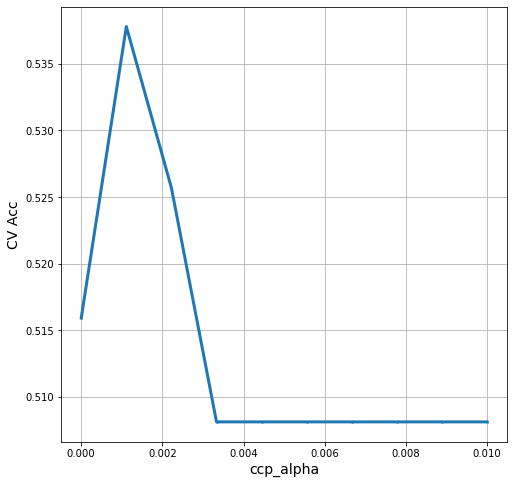

Best CP value {'ccp_alpha': 0.0011111111111111111}


In [52]:
plt.figure(figsize=(8,8))
plt.xlabel('ccp_alpha', fontsize=14)
plt.ylabel('CV Acc', fontsize= 14)
plt.scatter(ccpalpha, acc_scores, s=2)
plt.plot(ccpalpha, acc_scores, lw=3)
plt.grid(True, which='both')
plt.show()

print('Best CP value', tree_cv.best_params_)

In [53]:
## Random Forest

from sklearn.ensemble import RandomForestClassifier
import time 

gridvals={'max_features': np.linspace(20, 40, 5, dtype='int32'),
         "min_samples_leaf": [5],
         "n_estimators":[300],
         "random_state":[88]}

tic=time.time()

randomforest=RandomForestClassifier()
randomforestcv= GridSearchCV(randomforest, param_grid=gridvals, cv=5)
randomforestcv.fit(dtm_train, y_train)
toc=time.time()
print("Time:", round(toc-tic,2),"s")

Time: 909.12 s


In [54]:
## LDA

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(dtm_train, y_train)

LinearDiscriminantAnalysis()

In [58]:
# Creating baseline model now

from sklearn.metrics import confusion_matrix
default_f= np.sum(y_train==0)
default_t= np.sum(y_train==1)
print(pd.Series({'0':default_f, '1':default_t}))

0    9780
1    9467
dtype: int64


In [66]:
baseline_acc= default_f/(default_f+default_t)
baseline_TPR= 0
baseline_FPR=0
baseline_PRE=0

In [60]:
## Gatherinh statistics from each model for comparison

#Log reg

log_prob= logreg.predict(dtm_test)
log_pred= pd.Series([1 if p>0.5 else 0 for p in log_prob], index=log_prob.index)

cm=confusion_matrix(y_test, log_pred)
log_acc= (cm.ravel()[0]+cm.ravel()[3])/sum(cm.ravel())
log_TPR = cm.ravel()[3]/(cm.ravel()[2]+cm.ravel()[3])
log_FPR= cm.ravel()[1]/(cm.ravel()[0]+cm.ravel()[1])
log_PRE = cm.ravel()[3]/(cm.ravel()[1]+cm.ravel()[3])
print("Confusion Matrix: \n", cm)

Confusion Matrix: 
 [[2433 1697]
 [1881 2238]]


In [61]:
#Decision tree 

dtc_pred= tree_cv.best_estimator_.predict(dtm_test)
cm1= confusion_matrix(y_test, dtc_pred)
print("Confusion matrix: \n", cm1)

dtc_acc= (cm1.ravel()[0]+cm1.ravel()[3])/sum(cm1.ravel())
dtc_TPR = cm1.ravel()[3]/(cm1.ravel()[2]+cm1.ravel()[3])
dtc_FPR= cm1.ravel()[1]/(cm1.ravel()[0]+cm1.ravel()[1])
dtc_PRE = cm1.ravel()[3]/(cm1.ravel()[1]+cm1.ravel()[3])

Confusion matrix: 
 [[3221  909]
 [2870 1249]]


In [62]:
# LDA stats

y_pred = lda.predict(dtm_test)
cm2 = confusion_matrix(y_test, y_pred)
print("Confusion Matrix: \n", cm2)

lda_acc= (cm2.ravel()[0]+cm2.ravel()[3])/sum(cm2.ravel())
lda_TPR = cm2.ravel()[3]/(cm2.ravel()[2]+cm2.ravel()[3])
lda_FPR= cm2.ravel()[1]/(cm2.ravel()[0]+cm2.ravel()[1])
lda_PRE = cm2.ravel()[3]/(cm2.ravel()[1]+cm2.ravel()[3])

Confusion Matrix: 
 [[2564 1566]
 [2018 2101]]


In [64]:
# Random forest

y_pred_rf= randomforestcv.best_estimator_.predict(dtm_test)
cm3= confusion_matrix(y_test, y_pred_rf)

print("Confusion matrix: \n", cm3)
rf_acc= (cm3.ravel()[0]+cm3.ravel()[3])/sum(cm3.ravel())
rf_TPR = cm3.ravel()[3]/(cm3.ravel()[2]+cm3.ravel()[3])
rf_FPR= cm3.ravel()[1]/(cm3.ravel()[0]+cm3.ravel()[1])
rf_PRE = cm3.ravel()[3]/(cm3.ravel()[1]+cm3.ravel()[3])

Confusion matrix: 
 [[2563 1567]
 [1929 2190]]


In [68]:
#Create Comparison Table
#These lines are provided for you to help construct a comparison table.
#It is not requred to follow this format. + You need to find ACC, TPR, FPR, PRE for each model that you choose.
comparison_data = {'Baseline':[baseline_acc,baseline_TPR,baseline_FPR, baseline_PRE],
                   'Logistic Regression':[log_acc,log_TPR,log_FPR, log_PRE],
                   'Decision Tree Classifier':[dtc_acc,dtc_TPR,dtc_FPR,dtc_PRE],
                   'Random Forest with CV':[rf_acc,rf_TPR, rf_FPR,rf_PRE],
                  'Linear Discriminant Analysis':[lda_acc,lda_TPR, lda_FPR,lda_PRE]}

comparison_table = pd.DataFrame(data=comparison_data, index=['Accuracy', 'TPR', 'FPR','PRE']).transpose()
#comparison_table.style.set_properties(**{'font-size': '12pt',}).set_table_styles([{'selector': 'th', 'props': [('font-size', '10pt')]}])
comparison_table

,Accuracy,TPR,FPR,PRE
Baseline,0.508131,0.000000,0.000000,0.000000
Logistic Regression,0.566250,0.543336,0.410896,0.568742
Decision Tree Classifier,0.541884,0.303229,0.220097,0.578777
Random Forest with CV,0.576191,0.531682,0.379419,0.582912
Linear Discriminant Analysis,0.565523,0.510075,0.379177,0.572948


In [69]:
# Bootstrap
def bootstrap_val(test_data, test_label, model, sample=500, random_state=88):
    tic=time.time()
    n= sample
    output=np.zeros([n, 4])
    output[:]=np.nan
    for bsiter in range(n):
        bootstrap_ind= np.random.choice(test_data.index, len(test_data.index),
                        replace=True)
        bootstrap_data= test_data.loc[bootstrap_ind]
        bootstrap_label = test_label.loc[bootstrap_ind]
        bootstrap_prob= model.predict(bootstrap_data)
        bootstrap_pred= pd.Series([1 if p>0.5 else 0 for p in bootstrap_prob], index= bootstrap_prob.index)
        cm= confusion_matrix(test_label, bootstrap_pred)
        log_acc= (cm.ravel()[0]+cm.ravel()[3])/sum(cm.ravel())
        log_TPR = cm.ravel()[3]/(cm.ravel()[2]+cm.ravel()[3])
        log_FPR= cm.ravel()[1]/(cm.ravel()[0]+cm.ravel()[1])
        log_PRE = cm.ravel()[3]/(cm.ravel()[1]+cm.ravel()[3])
        output[bsiter, :]=np.array([log_acc, log_TPR, log_FPR, log_PRE])
        
    df_output=pd.DataFrame(output)
    return df_output
        

In [72]:
bs = bootstrap_val(dtm_test, y_test, logreg, sample=1000)

In [73]:
# in order to better our analysis we can look at the quartiles of different models performance for the required metrics
# essentially we are creating confidence intervals

ci_acc= np.quantile(bs.iloc[:,0], np.array([0.025, 0.0975]))
ci_TPR= np.quantile(bs.iloc[:,1], np.array([0.025, 0.0975]))
ci_FPR= np.quantile(bs.iloc[:,2], np.array([0.025, 0.0975]))
ci_PRE= np.quantile(bs.iloc[:,3], np.array([0.025, 0.0975]))

mean_acc=np.mean(bs.iloc[:,0])
std_acc=np.std(bs.iloc[:,0])
mean_TPR=np.mean(bs.iloc[:,1])
std_TPR=np.std(bs.iloc[:,1])
mean_FPR=np.mean(bs.iloc[:,2])
std_FPR=np.std(bs.iloc[:,2])
mean_PRE=np.mean(bs.iloc[:,3])
std_PRE=np.std(bs.iloc[:,3])



In [75]:
bs_data= {'Acc':[ci_acc[0],ci_acc[1], mean_acc, std_acc], 
         'TPR': [ci_TPR[0], ci_TPR[1], mean_TPR, std_TPR],
         'FPR': [ci_FPR[0], ci_FPR[1], mean_FPR, std_FPR],
         'PRE': [ci_PRE[0], ci_PRE[1], mean_PRE, std_PRE]}
bs_table= pd.DataFrame(data=bs_data, index=['0.025 Qtl', '0.975 Qtl', 'Mean', 'SD']).transpose()
bs_table

,0.025 Qtl,0.975 Qtl,Mean,SD
Acc,0.488905,0.493078,0.499876,0.005530
TPR,0.462005,0.467346,0.477021,0.007770
FPR,0.462222,0.467410,0.477331,0.007743
PRE,0.487716,0.492060,0.499171,0.005795



## Report details of your training procedures and final comparisons on the test set in this cell. Use your best judgment to choose a final model and explain your choice.

I chose to work with LDA, logistic regression, random forest, and decision tree classifiers. In both LDA and Logreg we used the fact whether a question was considered good or not as our dependent variable by binary encoding and used the text as independent variables. In the decision tree we used 10-fold cross-val. In the random forest we used 10-fold cross-val too along with grid search across the required parameters. By comparison, it appears the logistic regression has the highest accuracy and it is balanced by a good TPR. Similarly, RF also has high accuracy and high TPR. 

## Report Bootstrap Analysis in this cell

### (c)
I think a good metric for the models for this question would be the use of precision. This is because we need to ensure the highest ranked question is actually useful. I used the results from the comparison table. In terms of the precision score, I noticed that RF with CV has the highest value. But I am concerned about time required for retraining the model. I also see that similar to the previous question the logistic regression model has a high precision score along with good accuracy and TPR. In the following cell I will look at the precision recall score from the sklearn package. 

Additionally by looking at the baseline model we see that about 50% of the questions in our test set are "good questions." Thus, if we are given say 20 questions, we will have on avg 10 good questions and we want atleast 1 to be a positive prediction --> We know that the TPR should be atleast 1/10.  In our problem, since there are 15 questions on a page, we want atleast 1/7.5 to be a positive prediction. 


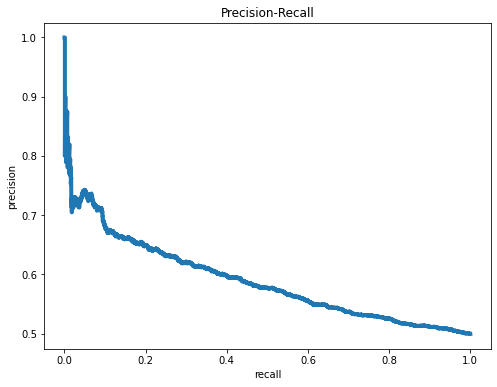

In [77]:
from sklearn.metrics import precision_recall_curve 
from sklearn.metrics import auc

prec, recall,_= precision_recall_curve(y_test, log_prob)

plt.figure(figsize=(8,6))
plt.title('Precision-Recall')
plt.xlabel('recall')
plt.ylabel('precision')
plt.plot(recall, prec, lw=4)
plt.show()

Continuing from the previous answer box, we see that we need a method that performs better than the current precision on Stack Exchange (which has a value pf 0.5). Thus, let's say we want a value that makes TPR >= 0.15 so that there is some buffer (this is a valye greater than 1/7.5 so that we have a good buffer).

In [84]:
goodvals= recall[1:] >= 0.15
np.nonzero(goodvals)

(array([   0,    1,    2, ..., 7306, 7307, 7308]),)

In [85]:
p= _[7200]
print(p)

0.6720648785389117


Thus, to improve the model we would use the above value as a threshold for the logreg model and retrain it and print out the confusion matrix. This should, in theory, improve our model. Let's see the results. 


In [88]:
#Log reg retrained

log_pred= pd.Series([1 if x>p else 0 for x in log_prob], index=log_prob.index)

cm=confusion_matrix(y_test, log_pred)
log_acc= (cm.ravel()[0]+cm.ravel()[3])/sum(cm.ravel())
log_TPR = cm.ravel()[3]/(cm.ravel()[2]+cm.ravel()[3])
log_FPR= cm.ravel()[1]/(cm.ravel()[0]+cm.ravel()[1])
log_PRE = cm.ravel()[3]/(cm.ravel()[1]+cm.ravel()[3])
print("Confusion Matrix: \n", cm)
print(log_acc, 
      log_TPR, 
      log_FPR, 
      log_PRE)

Confusion Matrix: 
 [[3774  356]
 [3431  688]]
0.5409140501879016 0.1670308327263899 0.08619854721549637 0.6590038314176245


As we see from above, the results of our retraining helped. The precision has gone up to about 0.65 from 0.56 and the FPR has gone down to 0.086 from 0.41. Clearly, our model is better than the current method by Stack Exchange. 